In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
START_DATE = '2019-01-01'
END_DATE = '2021-01-06'
ATT = 'T'
VERIZON = 'VZ'
SP500 = 'SP&500'

Before running this code, 'mykey' in the url need to be replaced with api key. The api key is freely obtainable from https://www.alphavantage.co/ .

In [3]:
def load_csv_parse(symbol):
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+symbol+"&outputsize=full&apikey=mykey&datatype=csv"
    df = pd.read_csv(url, parse_dates = ['timestamp'], index_col = 'timestamp')
    
    return df

In [4]:
def extract_slice(df):
    return df.sort_index().loc[START_DATE:END_DATE]

In [5]:
def normalize(df):
    return df.div(df.iloc[0]).mul(100)

#### Loading historical AT&T and Verizon stock prices from Alpha Vantage API

In [6]:
df_T = load_csv_parse(ATT)

In [7]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5779 entries, 2022-10-18 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5779 non-null   float64
 1   high    5779 non-null   float64
 2   low     5779 non-null   float64
 3   close   5779 non-null   float64
 4   volume  5779 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.9 KB


In [8]:
df_VZ = load_csv_parse(VERIZON)

In [9]:
df_VZ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5779 entries, 2022-10-18 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5779 non-null   float64
 1   high    5779 non-null   float64
 2   low     5779 non-null   float64
 3   close   5779 non-null   float64
 4   volume  5779 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.9 KB


#### Loading S&P 500 benchmark data

In [10]:
df_sp500 = load_csv_parse(SP500)

In [11]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4628 entries, 2022-10-18 to 2004-06-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4628 non-null   float64
 1   high    4628 non-null   float64
 2   low     4628 non-null   float64
 3   close   4628 non-null   float64
 4   volume  4628 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 216.9 KB


### Data Analysis steps:
- Analyze historical daily closing stock prices for the period 2019-01-02 to 2021-01-06
- Visualize time series data of the two stocks
- Apply normalization to compare how the stocks perform relative to each other, and against a benchmark

In [12]:
dataset = pd.concat([df_T.close,df_VZ.close],axis = 1,keys = [ATT, VERIZON])
dataset = extract_slice(dataset)
dataset.head()

,T,VZ
timestamp,,
2019-01-02,29.54,56.02
2019-01-03,29.58,56.22
2019-01-04,30.34,56.36
2019-01-07,30.89,56.72
2019-01-08,31.28,58.38


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-01-02 to 2021-01-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       508 non-null    float64
 1   VZ      508 non-null    float64
dtypes: float64(2)
memory usage: 11.9 KB


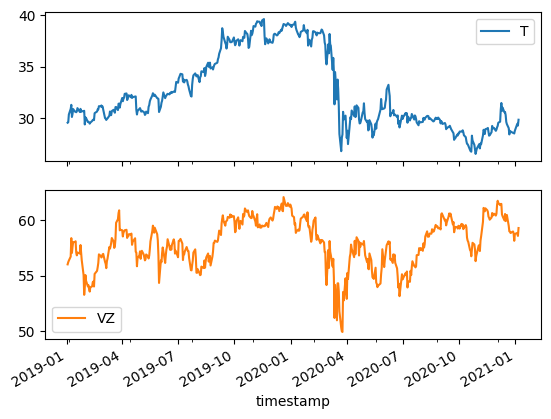

In [14]:
dataset.plot(subplots=True);

In [15]:
# Normalize data for comparison of stock growth rates
normalized =normalize(dataset)

In [16]:
normalized.head(3)

,T,VZ
timestamp,,
2019-01-02,100.000000,100.000000
2019-01-03,100.135410,100.357015
2019-01-04,102.708192,100.606926


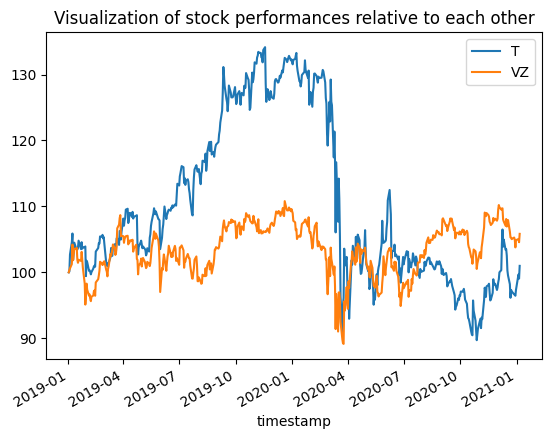

In [17]:
normalized.plot()
plt.title("Visualization of stock performances relative to each other");

In [18]:
benchmark = extract_slice(df_sp500)
benchmark = benchmark['close'].rename(SP500)

In [19]:
dataset = pd.concat([dataset,benchmark],axis = 1)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-01-02 to 2021-01-06
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       508 non-null    float64
 1   VZ      508 non-null    float64
 2   SP&500  508 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB


In [21]:
# Normalize data for comparison of stock growth rates
normalized_bench = normalize(dataset)

In [22]:
normalized_bench.head(3)

,T,VZ,SP&500
timestamp,,,
2019-01-02,100.000000,100.000000,100.000000
2019-01-03,100.135410,100.357015,97.186872
2019-01-04,102.708192,100.606926,100.133958


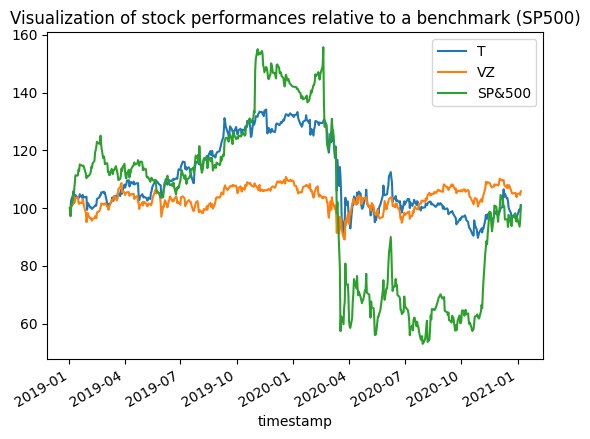

In [23]:
normalized_bench.plot()
plt.title("Visualization of stock performances relative to a benchmark (SP500)");